In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("PharamAI.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,Data Load,Claim Id,Claim Date,HCP ID,Specialty_Group,State,Payment Type,Target HCP,Product,Out of Pocket in $,Out of Pocket Type,Days Of Supply,Therapy,12 Month LB Period
0,14-Apr,52,1/1/2021,1516.0,NEUROLOGY,CA,State Medicaid,N,eptinezumab,125.0,Coinsurance,56.0,Migraine,N
1,14-Apr,60,1/1/2021,1301.0,NEUROLOGY,CA,Medicare MAPDP,Y,Ajovy,41.0,Coinsurance,56.0,Migraine,Y
2,14-Apr,107,1/1/2021,1798.0,PSYCHIATRY,DC,Medicare MAPDP,N,Emgality,129.0,Deductible,84.0,Migraine,Y
3,14-Apr,174,1/1/2021,1898.0,PSYCHIATRY,DE,Medicare MAPDP,Y,Aimovig,97.0,Deductible,84.0,Migraine,N
4,14-Apr,265,1/1/2021,1692.0,PSYCHIATRY,OH,Commercial,N,eptinezumab,25.0,Deductible,84.0,Migraine,Y


In [5]:
df.shape

(100000, 14)

In [14]:
df.isnull().sum()

Data Load             0
Claim Id              0
Claim Date            0
HCP ID                1
Specialty_Group       1
State                 1
Payment Type          1
Target HCP            1
Product               2
Out of Pocket in $    4
Out of Pocket Type    4
Days Of Supply        7
Therapy               1
12 Month LB Period    0
dtype: int64

#### Their are countable NULL values so we can fill it by central tendency

In [15]:
null_feature = [feature for feature in df.columns if df[feature].isnull().sum()>=1]

null_feature

['HCP ID',
 'Specialty_Group',
 'State',
 'Payment Type',
 'Target HCP',
 'Product',
 'Out of Pocket in $',
 'Out of Pocket Type',
 'Days Of Supply',
 'Therapy']

In [16]:
for feature in null_feature:
    df[feature]=df[feature].fillna(df[feature].mode()[0])    

## <span style=color:red>Description of Data</span>
* Data Load : date of data loaded
* Claim ID : its unique that's why its primary key
* Claim Date : Claiming Date between January and February
* HCP ID: Healthcare Professional ID
* Target HCP 
* Out of Pocket in $
* Therapy
* Days of Supply
* 12 Month LB Period 

#### Specialty Group:
* PSYCHIATRY : Diagnosis, treatment of mental disorders
* NEUROLOGY :  dealing with disorders of the nervous system
* IM/FM : Internal Medicine and Family Medicine
* NP/PA : 

#### State : all the countries form the United State

#### Payment type: 
* State Medicaid
* Commercial
* Medicare MAPDP
* Medicare PDP
* Managed Medicaid
* Other

#### Product :
* eptinezumab
* Ajovy
* Emagality
* Aimovig


#### Out of Pocket Type :
* Coinsurance
* Deductible : Firstly Paid by user then after Insurance company will give to user
* Copay : 10% amount to pay by user to Hospital/__

### Which product is the leading the market?

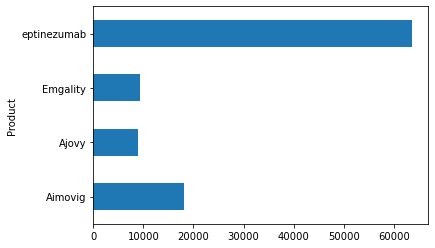

In [18]:
df.groupby("Product")["Out of Pocket in $"].count().plot(kind="barh")

### What is the average out of Pocket?

In [19]:
df["Out of Pocket in $"].mean()

57.05064

### Does demographic have any influence on the scale?

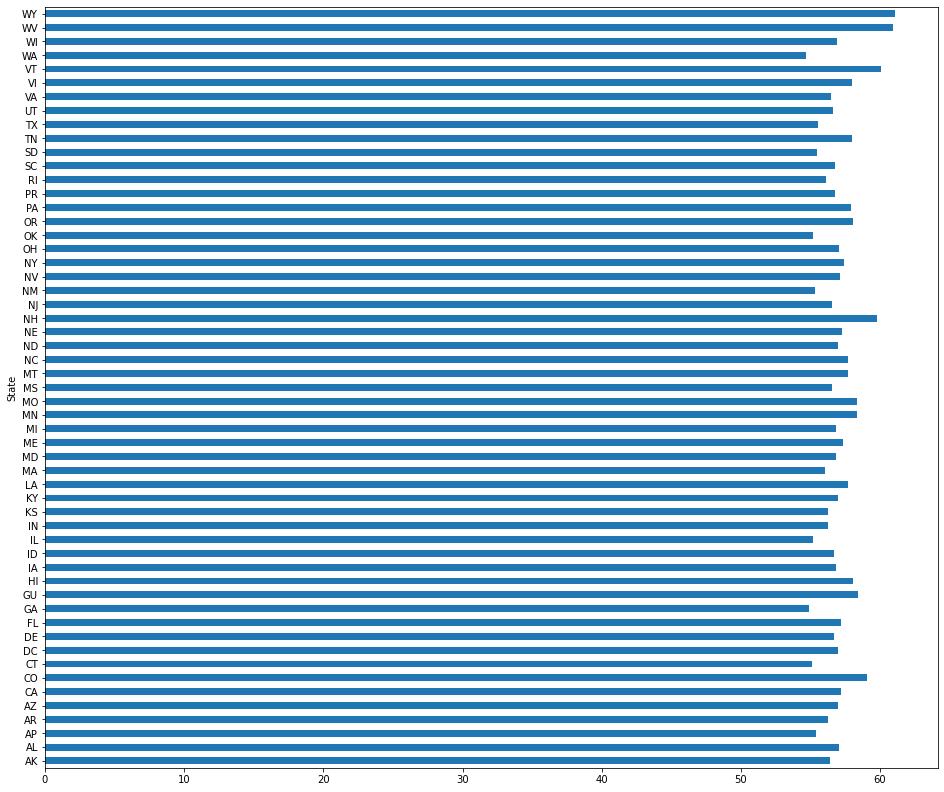

In [43]:
plt.figure(figsize=(16,14))
df.groupby(["State"])["Out of Pocket in $"].mean().plot(kind="barh")

### Who are my top 50 potential-targets?

In [45]:
df.pivot_table(index="State", columns=["Product"], values="Out of Pocket in $")

Product,Aimovig,Ajovy,Emgality,eptinezumab
State,,,,
AK,61.026465,58.209459,61.694444,54.109576
AL,55.741935,65.492958,59.236111,56.173486
AP,54.901961,58.148649,58.463415,54.731978
AR,55.101626,52.709677,49.906250,57.940924
AZ,57.212454,65.156863,57.856000,55.357222
CA,58.094167,57.441824,57.134069,56.909154
CO,55.428571,60.958904,57.258824,60.210630
CT,51.816327,60.536232,52.422680,55.590517
DC,57.491639,58.518987,56.601351,56.615459
